## Plotting the temperature

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read 'weather.csv' into a DataFrame named 'weather'
weather = pd.read_csv('weather.csv')
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

              TMIN         TAVG         TMAX
count  7996.000000  1217.000000  8005.000000
mean     42.099425    52.493016    61.247096
std      17.386667    17.829792    18.495043
min     -10.000000     6.000000    13.000000
25%      29.000000    39.000000    46.000000
50%      42.000000    54.000000    62.000000
75%      57.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


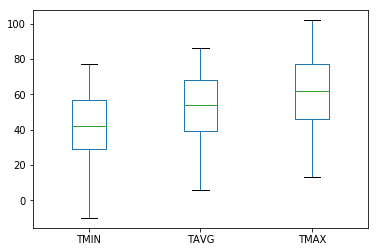

In [3]:
# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')

# Display the plot
plt.show()

## Plotting the temperature difference

In [4]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']

In [5]:
# Describe the 'TDIFF' column
print(weather['TDIFF'].describe())

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64


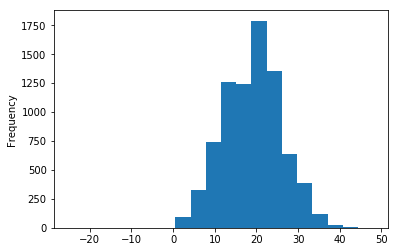

In [6]:
# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist', bins=20)

# Display the plot
plt.show()

## Counting bad weather conditions

In [7]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

In [8]:
# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

In [9]:
# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

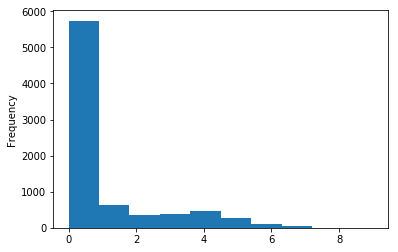

In [10]:
# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

# Display the plot
plt.show()

## Rating the weather conditions

In [11]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

0    5738
1     628
2     368
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64


In [12]:
# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

In [13]:
# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

In [14]:
# Count the unique values in 'rating'
print(weather.rating.value_counts())

good     5738
bad      1852
worse     432
Name: rating, dtype: int64


## Changing the data type to category

In [20]:
# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

In [21]:
# Change the data type of 'rating' to category. *) As for now it is depricated
# weather['rating'] = weather.rating.astype('category', ordered=True, categories=cats)
# New, recommended style
weather['rating'] = pd.Categorical(weather['rating'], ordered=True, categories=cats)

In [22]:
# Examine the head of 'rating'
print(weather.rating.head())

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]
